In [2]:
import numpy as np

## Problem 1

$$A =
\begin{pmatrix}
    -2 & -1 & -3\\
    11 & 10 & 0\\
    -4 & -2 & -7\\
    31 & 29 & -3\\
\end{pmatrix}$$

In [57]:
A = np.array(((-2, -1, -3), (11, 10, 0), (-4, 2, 7), (31, 29, -3)))

In [58]:
A

array([[-2, -1, -3],
       [11, 10,  0],
       [-4,  2,  7],
       [31, 29, -3]])

In [59]:
A[:3]

array([[-2, -1, -3],
       [11, 10,  0],
       [-4,  2,  7]])

In [60]:
np.linalg.det(A[:3])

-248.99999999999994

We have 
\begin{vmatrix}
-2 & -1 & -3 \\ 
11 & 10 & 0 \\ 
-4 & -2 & -7 \\ 
\notag
\end{vmatrix}
isn't zero, so A is already full column rank 3

In [61]:
def pseudoinverse(A):
    return (np.linalg.inv(A.T @ A) @ A.T)

In [62]:
print("Pseudoinverse is shown below:\n")
print(pseudoinverse(A))

Pseudoinverse is shown below:

[[-0.25447244  0.07594012 -0.12048193 -0.02665206]
 [ 0.25264695 -0.06535232  0.13253012  0.05659   ]
 [-0.21759766  0.06206645  0.03614458 -0.03139832]]


## Problem 2

### SVD matrix decomposition

In [9]:
def svd(a):
    if a.shape[0] >= a.shape[1]:
        m = a @ a.T
        s, u = np.linalg.eig(m)
        s = np.diagflat(np.append(s, [0]))
        for i in range(len(s)):
            if (s[i][i] == 0):
                s = s[:i, :i]
                u = u[:, :i]
        s_inv = s.copy()
        for i in range(len(s)):
            s_inv[i][i] = s_inv[i][i] ** (-1)
        v = s_inv @ u.T @ a
        return u, s, v

    m = a.T @ a
    s, v = np.linalg.eig(m)
    s = np.diagflat(np.append(s, [0]))
    for i in range(len(s)):
        if (s[i][i] == 0):
            s = s[:i, :i]
            v = v[:i,:]
    s_inv = s.copy()
    for i in range(len(s)):
        s_inv[i][i] = s_inv[i][i] ** (-1)
    u = s_inv @ v.T @ a
    return u, s, v

In [24]:
B = np.array(((2, 1, 0), (1, 1, 0), (0, 1, 1), (1, 0, -1)))

In [25]:
U, S, V = svd(B)

#### S is a matrix with singular values on main diagonal

In [26]:
print(S)

[[  7.87298335e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.27016654e-01   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   4.44089210e-16   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   3.00000000e+00]]


#### Computing accuracy of our SVD:

In [27]:
print(U @ S @ V)
print(np.sum(U @ S @ V - B))

[[  2.00000000e+00   1.00000000e+00  -5.55111512e-17]
 [  1.00000000e+00   1.00000000e+00  -1.11022302e-16]
 [  5.55111512e-17   1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   5.55111512e-17  -1.00000000e+00]]
-5.55111512313e-17


Pseudoinverse of B using SVD decomposition:

In [31]:
B_inverse = np.transpose(V) @ np.linalg.inv(S) @ np.transpose(U)

In [32]:
B_inverse

array([[  6.20519176e+00,  -3.51008885e+14,   3.51008885e+14,
          3.51008885e+14],
       [ -8.81000115e+00,  -3.25019307e+14,   3.25019307e+14,
          3.25019307e+14],
       [  8.56999655e+00,  -9.75057921e+14,   9.75057921e+14,
          9.75057921e+14]])

## Problem 3

$$ Cx = b $$

In [33]:
C = np.array(((1, -2, -1, 0), (7, 5, 0, -2), (-1, -1, 1, 1), (22, 13, -1, -8)))

In [34]:
print(C)

[[ 1 -2 -1  0]
 [ 7  5  0 -2]
 [-1 -1  1  1]
 [22 13 -1 -8]]


In [35]:
b = np.array((-1, 5, -1, 15))

In [36]:
np.linalg.det(C)

-42.000000000000007

#### As determinant is nonzero, the matrix is invertible, so best solution is $$ x = C^{-1} * b $$

In [37]:
x = np.linalg.inv(C) @ b

In [40]:
C @ x

array([ -1.,   5.,  -1.,  15.])

$$ x = \frac{3}{14}, y = \frac{1}{2}, z = \frac{3}{14}, t = \frac{1}{2} $$

## Problem 4

In [42]:
from random import random
import matplotlib.pyplot as pl
from math import pi, sin

def graph(deg):
    data = np.array([[1937, 0],
                    [1949, 0],
                    [1950, -1],
                    [1951, -6],
                    [1952, -1],
                    [1953, -3],
                    [1954, -2],
                    [1956, -4],
                    [1957, -1],
                    [1959, -5],
                    [1960, -4],
                    [1962, 1],
                    [1963, 0],
                    [1964, -2],
                    [1965, -6],
                    [1966, -1],
                    [1967, 1],
                    [1968, -3],
                    [1969, 2],
                    [1970, -2],
                    [1973, -2],
                    [1974, 2],
                    [1975, -3],
                    [1976, -1],
                    [1977, 2],
                    [1978, 2],
                    [1979, -1],
                    [1980, -2],
                    [1981, -1],
                    [1982, 2],
                    [1983, -2],
                    [1984, -4],
                    [1985, -3],
                    [1986, 0],
                    [1988, -4],
                    [1989, -3],
                    [1990, 0],
                    [1991, 1],
                    [1992, -3],
                    [1993, -8],
                    [1994, -3],
                    [1995, -3],
                    [1996, 4],
                    [1997, -1],
                    [1998, -8],
                    [1999, -5],
                    [2000, 0],
                    [2001, -1],
                    [2002, -2],
                    [2003, 1],
                    [2004, -2],
                    [2005, 1],
                    [2006, 1],
                    [2007, -2],
                    [2008, 2],
                    [2009, 2],
                    [2010, 3],
                    [2011, 0],
                    [2012, 2],
                    [2013, 4],
                    [2014, -1],
                    [2015, 1],])
    x_data = data[ : ,0]
    y_train = data[ : ,1]
    x_train = np.zeros((0, len(x_data)))
    for d in range(deg):
        x_temp = x_data
        x_temp = x_temp ** float(d)
        x_train = np.vstack((x_temp, x_train))
    list_coord = np.linalg.inv(x_train @ np.transpose(x_train)) @ x_train @ np.transpose(y_train)

    
    pl.figure(figsize=(8, 5))
    pl.grid(True)
    pl.title('Linear Regression')

    def line(x):
        ans = 0
        d = deg - 1
        for wi in list_coord:
            ans += wi * x ** float(d)
            d -= 1
        return ans

    pl.plot(x_data, [line(x) for x in x_data], color='green', linewidth=2, alpha=0.3)
    pl.scatter(x_train[deg - 2, :], y_train, s=80, color='blue', alpha=0.3)
    pl.show()
    return line(2017)

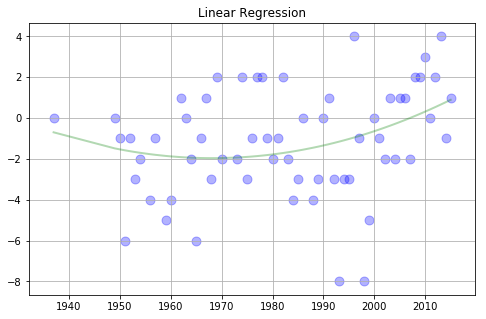

1.144881346


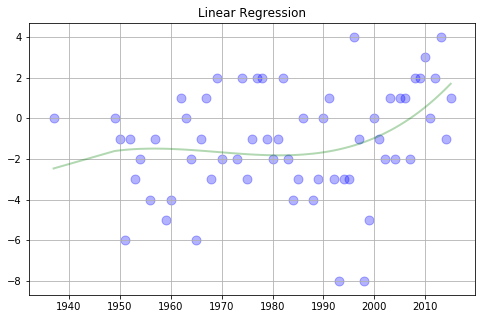

2.23835615756


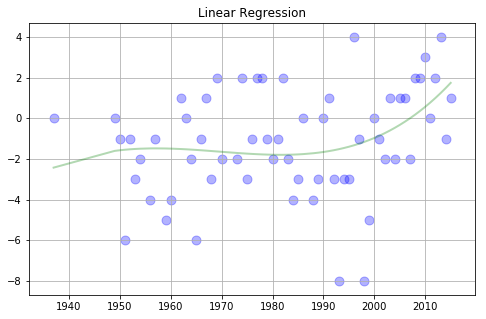

2.29728997848


In [49]:
#real temp was +1.7 celsium
min_diff = 100
min_i = 0
val_2017 = 0
for i in range(3, 6):
    val = graph(i)
    print(val)

## Problem 5

$$A =
\begin{bmatrix}
    0_{1,1} & 0_{1,2} & 0_{1,3} & \dots  & 0_{1,10} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1_{5,1} & 0_{5,2} & \dots  & 1_{5,9} & 0_{5, 10} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0_{9,1} & 0_{9,2} & 0_{9,3} & \dots  & 0_{9,10} \\
    0_{10,1} & 0_{10,2} & 0_{10,3} & \dots  & 0_{10,10} \\
\end{bmatrix} = F \cdot G = 
\begin{bmatrix}
    0_{1,1} \\
    \vdots \\
    1_{5,1} \\
    \vdots \\
    0_{9,1} \\
    0_{10,1} \\
\end{bmatrix} \cdot 
\begin{bmatrix}
    1_{1,1} & 0_{1,2} & \dots & 1_{1, 9} & 0_{1,10} \\
\end{bmatrix}
$$

FORMULA FOR PSEUDOINVERSE OF FULL-RANK DECOMPOSITION:
$$ A^{+} = G^{+} \cdot F^{+} = G^{*} \cdot (GG^{*})^{-1} \cdot (F^{*}F)^{-1} \cdot F^{*} $$

In [53]:
A = np.zeros((10, 10))
A[4, 8] = 1
A[4, 0] = 1
F = np.zeros((10, 1))
F[4,] = 1
G = np.zeros((1, 10))
G[0, 0] = 1
G[0, 8] = 1
print('matrix A\n', A, '\n', 'matrix FG\n', F @ G)

matrix A
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] 
 matrix FG
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [55]:
G_pseudoinverse = np.transpose(G) @ np.linalg.inv(G @ np.transpose(G))
F_pseudoinverse = np.linalg.inv(np.transpose(F) @ F) @ np.transpose(F)
A_pseudoinverse = G_pseudoinverse * F_pseudoinverse
print(A_pseudoinverse)

[[ 0.   0.   0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]


## Problem 6

Given a set of $$ k + 1 $$ data points

$$
(x_{0},y_{0}),\ldots ,(x_{j},y_{j}),\ldots ,(x_{k},y_{k}) $$
where no two $ x_{j} $ are the same, the interpolation polynomial in the Lagrange form is a linear combination

$$
L(x):=\sum _{j=0}^{k}y_{j}\ell _{j}(x)
$$

of Lagrange basis polynomials

$$
\ell _{j}(x):=\prod _{\begin{smallmatrix}0\leq m\leq k\\m\neq j\end{smallmatrix}}{\frac {x-x_{m}}{x_{j}-x_{m}}}={\frac {(x-x_{0})}{(x_{j}-x_{0})}}\cdots {\frac {(x-x_{j-1})}{(x_{j}-x_{j-1})}}{\frac {(x-x_{j+1})}{(x_{j}-x_{j+1})}}\cdots {\frac {(x-x_{k})}{(x_{j}-x_{k})}}, $$

We have a set of (2 + 1) points:
$$ (-3, -49),\;\;\; (0, 2),\;\;\;(5, 487) $$

Then,

$$ L(x) = -49 * \ell _{0}(x) + 2 * \ell _{1}(x) + 487 * \ell _{2}(x) $$
$$\ell_{0}(x) = \frac{1}{24} x(x - 5) $$

$$\ell_{1}(x) = -\frac{1}{15} (x + 3)(x - 5)$$

$$\ell_{2}(x) = \frac{1}{40} x(x + 3)$$

Finally:

$$ L(x) = -\frac{49}{24} x(x - 5) - \frac{2}{15} (x + 3)(x - 5) + \frac{487}{40} x(x + 3) = 10x^{2} + 47x + 2$$

Let's check our solution:

In [68]:
def pol(x):
    return (10 * x ** 2 + 47 * x + 2)
print(-3, pol(-3))
print(0, pol(0))
print(5, pol(5))

-3 -49
0 2
5 487


## Problem 7


$$ \large S^{n}=\left\{x\in \mathbb {R} ^{n+1}:\left\|x\right\|<=r\right\}. $$

Let metrics be
$$ 
\left\|x\right\| = \sqrt{\frac{5x^{2} + 6xy + 5y^{2}}{72}}
$$

It is metrics because $$\;\; \sqrt{5x^{2} + 6xy + 5y^{2}} = \sqrt{s^{2} + t^{2}} \;\;$$ for  $$ s = (x\sqrt{5} +..) \text{  .....  } t = (y\sqrt(5.76) + ..) $$ 
$ \sqrt{s^{2} + t^{2}} $ is Euclidean distance.



Then $$ \left\{(x, y)\in \mathbb {R} ^{2}: 90x^{2} + 108xy + 90y^{2}<=1296\right\} $$ is a unit ball, because
$$ 90x^{2} + 108xy + 90y^{2} = (\sqrt{\frac{5x^{2} + 6xy + 5y^{2}}{72}})^{2} * 1296 $$

The norm of our vector is 
$$ \nu(\begin{bmatrix}
           9 \\
           -1 \\
         \end{bmatrix}) = \sqrt{\frac{405 - 54 + 5}{72}} = \sqrt{\frac{356}{72}} = \sqrt{\frac{89}{18}} $$